### Chargement des librarires nécessaires à l'exploitation des données :

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Chargement des bases de données au format "csv" avec la méthode "read_csv" de pandas pour l'année 2021 :

In [3]:
df_user_2021 = pd.read_csv("data/usagers-2021.csv", sep=';')

### Affichage des données :

In [4]:
df_user_2021

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129148,202100056516,100 885,A01,1,1,4,1,1975.0,0,1,-1,-1,0,0,-1
129149,202100056516,100 886,B01,1,1,4,1,2002.0,5,1,-1,-1,0,0,-1
129150,202100056517,100 884,A01,1,1,3,1,1999.0,0,0,-1,-1,0,0,-1
129151,202100056518,100 882,A01,1,1,3,1,1968.0,3,1,0,-1,-1,-1,-1


### Suppression des colonnes non nécessaires à l'aide de la méthode "drop" :

In [5]:
new_user_2021 = df_user_2021.drop(columns=["id_vehicule","num_veh","place","catu","trajet","secu1","secu2","secu3","locp","actp","etatp"], axis=1)
new_user_2021

,Num_Acc,grav,sexe,an_nais
0,202100000001,3,1,2000.0
1,202100000001,1,1,1978.0
2,202100000002,4,1,1983.0
3,202100000002,3,1,1993.0
4,202100000003,1,1,1995.0
...,...,...,...,...
129148,202100056516,4,1,1975.0
129149,202100056516,4,1,2002.0
129150,202100056517,3,1,1999.0
129151,202100056518,3,1,1968.0


<h3>Statistiques descriptives sur la table "utilisateurs-2021.csv"</h3>

D'après le graphique ci-dessous et pour l'année 2021 :

- 21,7 % des usagers accidentés et décédés sont des femmes 
- 28,7 % des usagers accidentés et indemnes sont des femmes
- 28,5 % des usages accidentés ayant été blessé et hospitalisé sont des femmes
- 36,4 % des usagers accidentés ayant été blessé léger sans hospitalisation sont des femmes

-----------------------------------------------------------------------
<i>grav = gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :
1 – Indemne
2 – Tué
3 – Blessé hospitalisé
4 – Blessé léger</i>

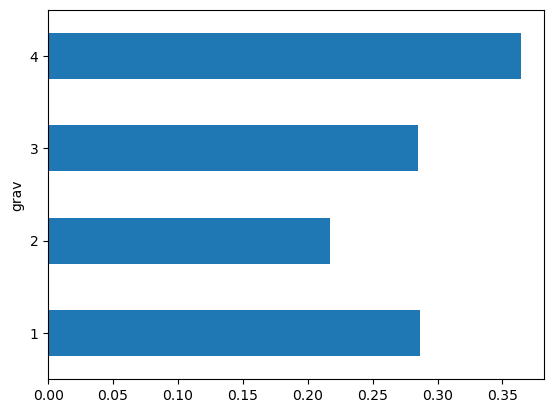

In [7]:
(
new_user_2021
    .query("grav!=-1")
    .query("sexe!=-1")
    .assign(sexe= lambda x: x.sexe -1)
    .groupby("grav")
    .sexe.mean()
    .plot(kind="barh")
);